In [5]:
import numpy as np
import loopfit as lf
import matplotlib.pyplot as plt

%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [6]:
f = np.linspace(4, 4 + 0.002, 1000)
true_params = {'f0': 4.0012,  # resonance frequency
               'qi': 100000,  # internal quality factor
               'qc': 30000,  # coupling quality factor
               'xa': 5e-6,  # resonance fractional asymmetry
               'a': 0.8,  # inductive nonlinearity
               'alpha': 1.2,  # IQ mixer amplitude imbalance
               'beta': 0.2,  # IQ mixer phase imbalance
               'gain0': 3.0,  # gain polynomial coefficients
               'gain1': 1000.0,
               'gain2': 50000.0,
               'phase0': 2.0,  # phase polynomial coefficients
               'phase1': -1000.0}

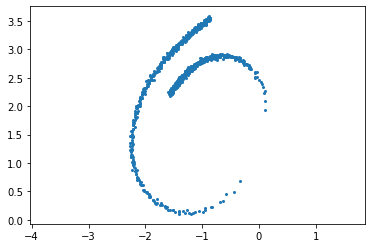

In [7]:
rs = np.random.RandomState(0)
loop = lf.model(f, **true_params)
loop += rs.normal(0, 0.02, loop.shape) + 1j * rs.normal(0, 0.02, loop.shape)

plt.plot(loop.real, loop.imag, 'o', markersize=2)
plt.axis('equal');

DEBUG:loopfit._wrap:Solver Summary (v 1.14.0-eigen-(3.3.7)-lapack-suitesparse-(5.7.2)-cxsparse-(3.1.9)-eigensparse-no_openmp-no_tbb)

                                     Original                  Reduced
Parameter blocks                            5                        4
Parameters                                 14                       12
Residual blocks                          1000                     1000
Residuals                                2000                     2000

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver ordering              AUTOMATIC                        4

Cost:
Initial                          1.105411e+02
Final                            

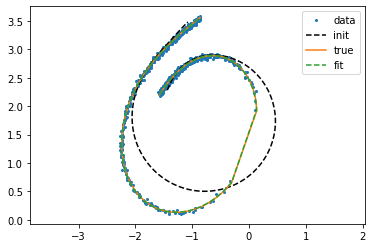

In [8]:
init_params = lf.guess(f, loop.real, loop.imag, nonlinear=True)
result = lf.fit(f, loop.real, loop.imag, nonlinear=True, imbalance=True,
                **init_params)

plt.plot(loop.real, loop.imag, 'o', markersize=2, label='data')


model_init = lf.model(f, **init_params)
plt.plot(model_init.real, model_init.imag, 'k--', label='init')

model = lf.model(f, **true_params)
plt.plot(model.real, model.imag, label='true')

model_fit = lf.model(f, **result)
plt.plot(model_fit.real, model_fit.imag, '--', label='fit')

plt.legend()
plt.axis('equal');

In [9]:
print(result['summary'])

Solver Summary (v 1.14.0-eigen-(3.3.7)-lapack-suitesparse-(5.7.2)-cxsparse-(3.1.9)-eigensparse-no_openmp-no_tbb)

                                     Original                  Reduced
Parameter blocks                            5                        4
Parameters                                 14                       12
Residual blocks                          1000                     1000
Residuals                                2000                     2000

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver ordering              AUTOMATIC                        4

Cost:
Initial                          1.105411e+02
Final                            3.809731e-01
Change 